Machine Learning


In [6]:
#Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

In [8]:
##Importando os dados
#Escrevendo em um arquivo.csv
url = "https://raw.githubusercontent.com/scudilio/Churn_model/master/dataset/Churn_Modelling.csv"
df = pd.read_csv(url)
df.head(10) #visualizando as 10 primeiras linhas do dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [9]:
pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cdbbd2ef0>,
      dtype=object)

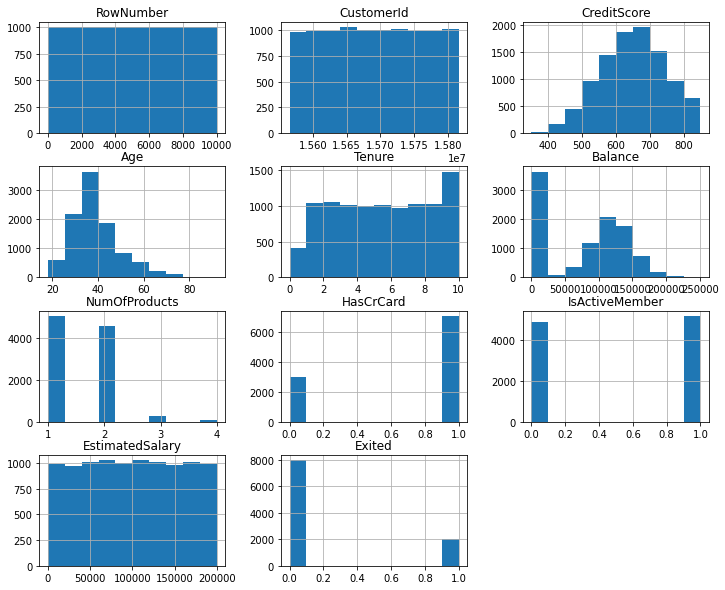

In [11]:
df.hist(figsize=(12,10))

In [12]:
df['Exited_cat']=df['Exited'].replace([0,1],['Não','Sim'])
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure', 'NumOfProducts']

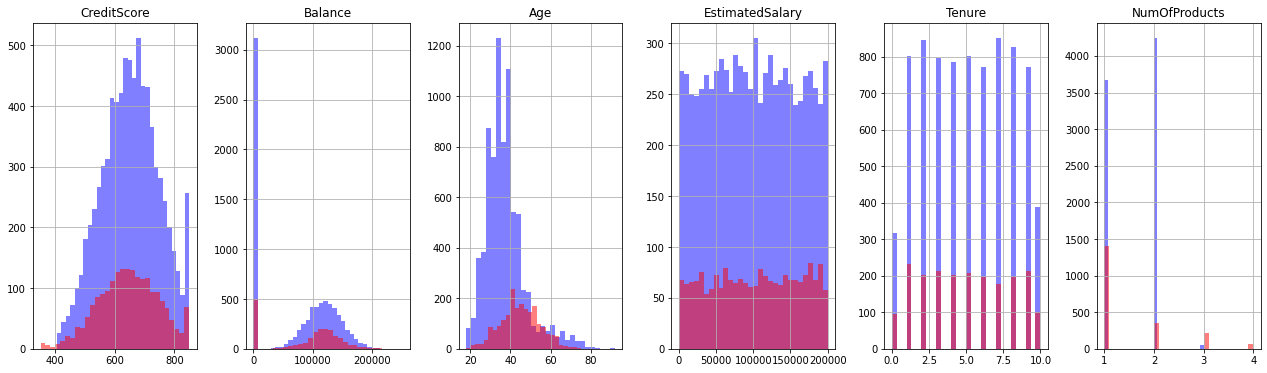

In [36]:
import matplotlib.pyplot as plt#visualização de dados;
fig, ax = plt.subplots(1, 6, figsize=(22, 6));
df[df.Exited_cat == "Não"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
df[df.Exited_cat == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

In [13]:
import numpy as np #  pacote algebra linear;
import seaborn as sns #visualização de dados;
import matplotlib.pyplot as plt#visualização de dados;

In [14]:
myred='#CD5C5C'
myblue='#6495ED'
mygreen='#90EE90'
cols= [myred, myblue,mygreen]

In [15]:
# porcentagem de clientes que sairam do banco
df['Exited'].sum()/df['Exited'].count()

0.2037

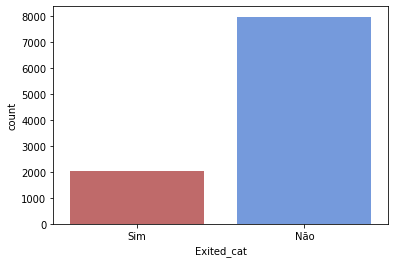

In [16]:

sns.countplot(data=df,x='Exited_cat',palette=cols);


**Variáveis Categóricas**

Primeiro vamos analisar as variáveis categóricas em relação a variável de saída (Exited). Utilizaremos gráficos de barras para esse fim.

**Variável Sexo**

In [17]:
#renomeando as categorias
df['Gender']=df['Gender'].replace(['Female','Male'],['Feminino','Masculino'])

In [18]:

df_plot = df.groupby ('Gender'). Exited.mean (). reset_index () 
df_plot

,Gender,Exited
0,Feminino,0.250715
1,Masculino,0.164559


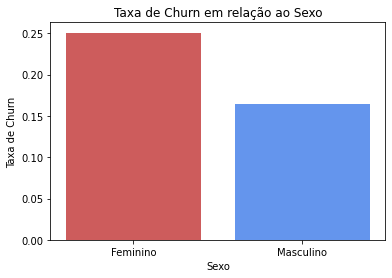

In [19]:
#Sexo em relação a variável churn
x =df_plot['Gender']
y=df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Sexo');
plt.xlabel('Sexo');
plt.ylabel('Taxa de Churn');

**Variável País**

In [20]:
df['Geography']=df['Geography'].replace(['France','Germany','Spain'],['França','Alemanha','Espanha'])

In [21]:
df_plot = df.groupby ('Geography'). Exited.mean (). reset_index () 
df_plot

,Geography,Exited
0,Alemanha,0.324432
1,Espanha,0.166734
2,França,0.161548


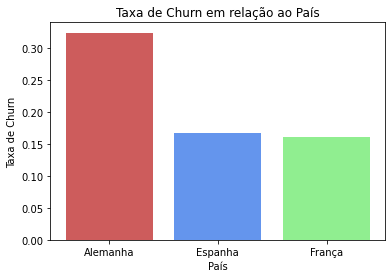

In [22]:
#País em relação a variável churn
x =df_plot['Geography']
y=df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao País');
plt.xlabel('País');
plt.ylabel('Taxa de Churn');

**Variável Cartão de Crédito**

In [23]:
df['HasCrCard']=df['HasCrCard'].replace([0,1],['Não','Sim'])
df_plot = df.groupby ('HasCrCard'). Exited.mean (). reset_index () 
df_plot

,HasCrCard,Exited
0,Não,0.208149
1,Sim,0.201843


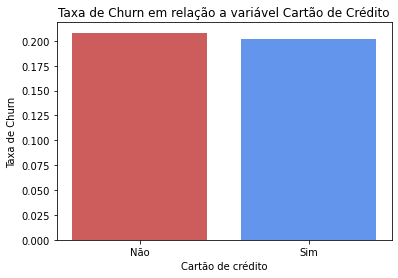

In [24]:
#Carão de crédito em relação a variável churn
x =df_plot['HasCrCard']
y=df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a variável Cartão de Crédito');
plt.xlabel('Cartão de crédito');
plt.ylabel('Taxa de Churn');

**Variável Membro Ativo**

In [25]:

df['IsActiveMember']=df['IsActiveMember'].replace([0,1],['Não','Sim'])
df_plot = df.groupby ('IsActiveMember'). Exited.mean (). reset_index () 
df_plot

,IsActiveMember,Exited
0,Não,0.268509
1,Sim,0.142691


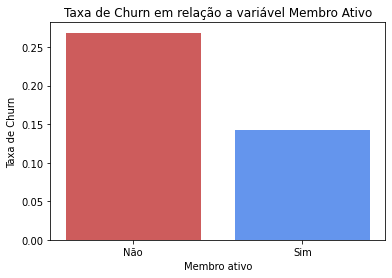

In [26]:
#Membro ativo em relação a variável churn
x =df_plot['IsActiveMember']
y=df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a variável Membro Ativo');
plt.xlabel('Membro ativo');
plt.ylabel('Taxa de Churn');

**Variáveis numéricas**

Para as variáveis numéricas utilizaremos variáveis de barras para variáveis discretas e gráfico de dispersão e box-plot para as variáveis contínuas. Também analisaremos a matriz de correlação para ver a correlação entre as variáveis.

Selecionamos, primeiramente, apenas as variáveis numéricas

In [27]:
df_cont=df[['Age','Balance','Tenure','NumOfProducts','EstimatedSalary']]
df_cont

,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
0,42,0.00,2,1,101348.88
1,41,83807.86,1,1,112542.58
2,42,159660.80,8,3,113931.57
3,39,0.00,1,2,93826.63
4,43,125510.82,2,1,79084.10
...,...,...,...,...,...
9995,39,0.00,5,2,96270.64
9996,35,57369.61,10,1,101699.77
9997,36,0.00,7,1,42085.58
9998,42,75075.31,3,2,92888.52


**Matriz de Correlação**

Utilizaremos a função heatmap() para entender o relacionamento entre as variáveis numéricas.

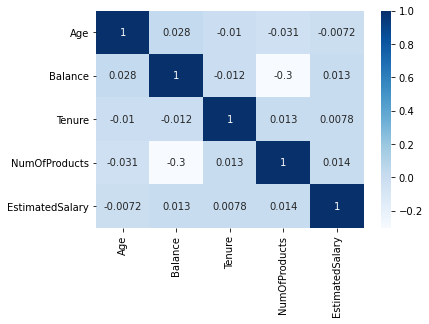

In [28]:
sns.heatmap(df_cont.corr(),annot = True,
            cmap='Blues');

**Variável Número de Produtos**

In [29]:
df_plot = df.groupby ('NumOfProducts').Exited.mean(). reset_index () 
df_plot

,NumOfProducts,Exited
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


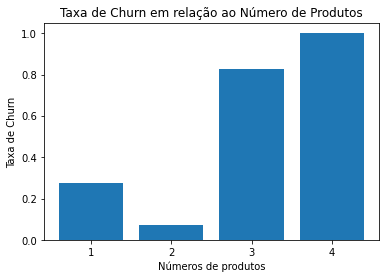

In [30]:
#Número de produtos em relação a variável churn
x =df_plot['NumOfProducts']
y=df_plot['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Número de Produtos');
plt.xlabel('Números de produtos');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (1,2,3,4));

**Variável Tenure**

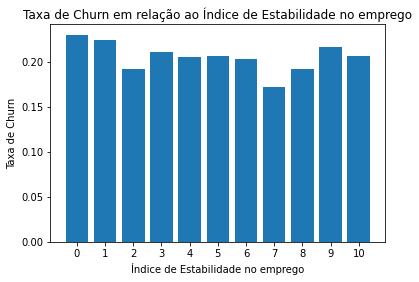

In [31]:
df_plot = df.groupby ('Tenure'). Exited.mean (). reset_index () 
#Número de produtos em relação a variável churn
x =df_plot['Tenure']
y=df_plot['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Índice de Estabilidade no emprego');
plt.xlabel('Índice de Estabilidade no emprego');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (0,1,2,3,4,5,6,7,8,9,10));

**Variável Saldo Bancário**

Exited_cat
Não    72745.296779
Sim    91108.539337
Name: Balance, dtype: float64

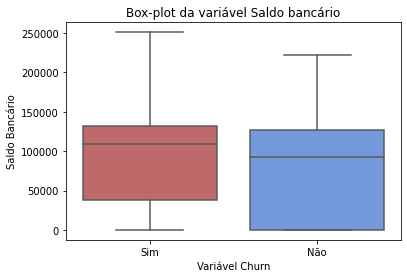

In [32]:
#box-plot salto bancario em relação ao Churn
cols= [myred, myblue,mygreen]
sns.boxplot(x="Exited_cat", y="Balance", data=df,palette=cols);
plt.title('Box-plot da variável Saldo bancário');
plt.xlabel('Variável Churn');
plt.ylabel('Saldo Bancário');
df.groupby(['Exited_cat'])['Balance'].mean()

**Variável Salário Estimado**

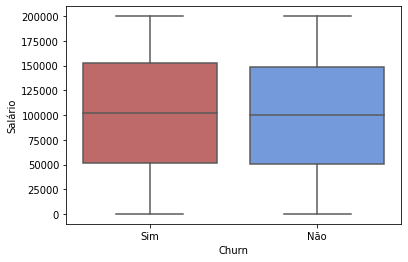

In [33]:
#box-plot salario pela variável churn
sns.boxplot(x="Exited_cat", y="EstimatedSalary" , data=df,palette=cols);
df.groupby(['Exited'])['EstimatedSalary'].mean()
plt.xlabel('Churn');
plt.ylabel('Salário');

**Variável Idade**

Text(0, 0.5, 'Taxa de Churn')

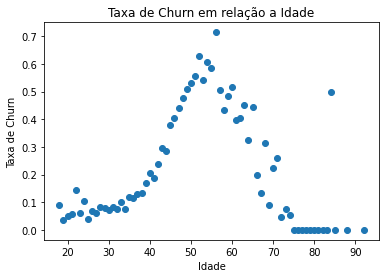

In [35]:
df_plot = df.groupby ('Age'). Exited.mean (). reset_index () 
#Número de produtos em relação a variável churn
x = df_plot['Age']
y = df_plot['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação a Idade')
plt.xlabel('Idade')
plt.ylabel('Taxa de Churn')

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

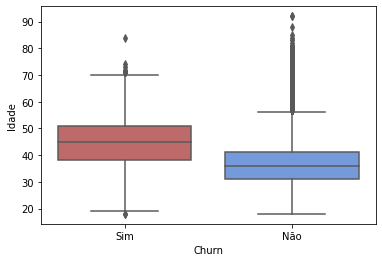

In [36]:
#box-plot Idade pelo Churn
sns.boxplot(x="Exited_cat", y="Age" , data=df,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Idade');
df.groupby(['Exited'])['Age'].mean()

**Variável Escore de Crédito**

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

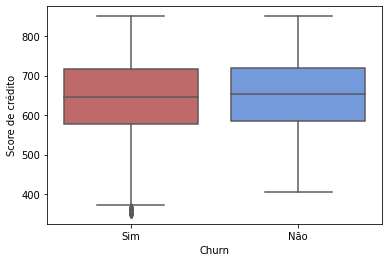

In [37]:
#box-plot score do cliente em relação ao churn

sns.boxplot(x="Exited_cat", y="CreditScore" , data=df,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Score de crédito');
df.groupby(['Exited'])['CreditScore'].mean()

Text(0, 0.5, 'Taxa de Churn')

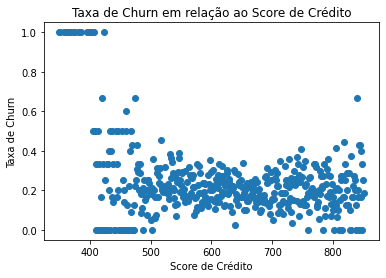

In [38]:
#Número de produtos em relação a variável churn
df_plot = df.groupby ('CreditScore'). Exited.mean (). reset_index () 

x =df_plot['CreditScore']
y=df_plot['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação ao Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Taxa de Churn')